In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

dyna_id,type,time,entity_id,traj_id,coordinates,current_dis,current_state


0,trajectory,2014-08-03T18:29:00Z,810,0,"[104.115353,30.64392]",0.0,1.0

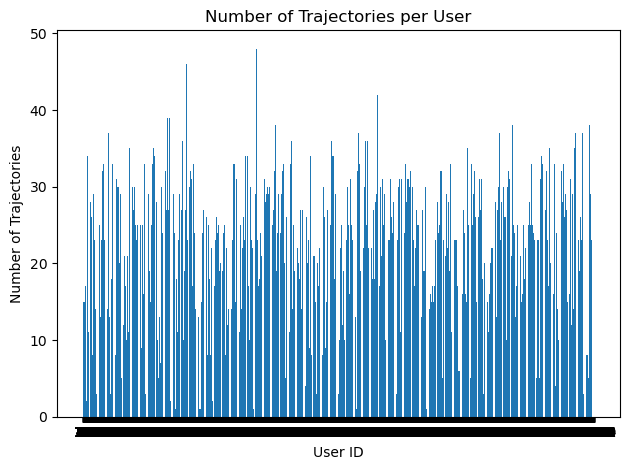

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用pandas读取数据



# csv_path = './raw/Chengdu_Sample1.dyna'
csv_path = './raw/Chengdu_20140803_1.dyna'
data = pd.read_csv(csv_path)

traj_counts = data.drop_duplicates(subset=['entity_id', 'traj_id']).groupby('entity_id').size()

plt.bar(traj_counts.index.astype(str), traj_counts.values)
plt.xlabel('User ID')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per User')
plt.tight_layout()
plt.show()


In [3]:
len(traj_counts)

4565

In [4]:
traj_counts

entity_id
1         1
2        29
3        24
4        24
5        26
         ..
13601    15
13602    26
13603    33
13604    20
13605    21
Length: 12857, dtype: int64

In [3]:
import seaborn as sns
def sns_plot(data, bins=50, kde = True):
    plt.figure(figsize=(10, 6))
    sns.displot(data, bins=bins, kde=kde)
    plt.xlabel(xlabel_name)
    plt.title(title)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    # plt.savefig(sav_dir + "_" + str(datetime.now()) + ".png")


NameError: name 'xlabel_name' is not defined

<Figure size 1000x600 with 0 Axes>

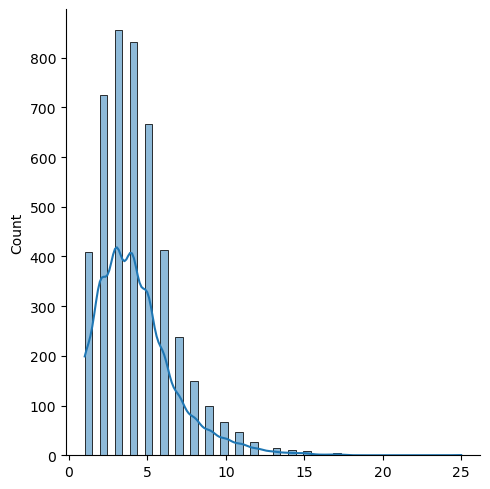

In [11]:
sns_plot(list(traj_counts))

In [13]:
df = pd.read_csv('./raw/Chengdu_Sample1.dyna', delimiter=',')

# 获取不同的entity_id
unique_entities = df['entity_id'].unique()

# 确定每个子集的大小
subset_size = len(unique_entities) // 4

# 划分entity_id为四个子集
subsets_entities = [unique_entities[i:i + subset_size] for i in range(0, len(unique_entities), subset_size)]

# 根据子集的entity_id提取数据，并写入到新的文件中
for idx, subset in enumerate(subsets_entities):
    subset_df = df[df['entity_id'].isin(subset)]
    subset_df.to_csv(f'subset_{idx + 1}.dyna', index=False)